# HelpMum DSSG Project 

## Data Cleaning and Processing 

In [1]:
# Importing neccessary libraries
import pandas as pd
import textract
import numpy as np
import utils as ut1
import ola_utils as ut2
from matplotlib import pyplot as plt

In [2]:
# Location of file on local device, need to alter
file_location = 'data/Data for HelpMum Data For maternal Project.pdf'

# Accessing link to the pdf file
text = textract.process(file_location, method='pdfminer')

### Arranging in tabular format

In [3]:
location = []
q1 = []
q2 = []
q3 = []
q4 = []
q5 = []
q6 = []

for line in text.decode('utf-8').split('\n\n'):
    if 'Question 1:' in line:
        q1.append(line)
    elif 'Question 2:' in line:
        q2.append(line)
    elif 'Question 3:' in line:
        q3.append(line)
    elif 'Question 4:' in line:
        q4.append(line)
    elif 'Question 5:' in line:
        q5.append(line)
    elif 'Question 6:' in line:
        q6.append(line)


# save to a dataframe
df = pd.DataFrame({ 'q1':q1, 'q2':q2, 'q3':q3, 'q4': q4, 'q5':q5, 'q6':q6})

# Removing new lines in dataframe
df.replace('\n','', regex=True, inplace=True)

questions =['q1', 'q2', 'q3', 'q4', 'q5', 'q6']
for question in questions:
    df[question] = df[question].str.split('?').str[1]

df.head()

,q1,q2,q3,q4,q5,q6
0,30,As often as possible.,Perforated womb(1).,,Prayers.,She delivered safely.
1,25,Not all of them attend regularly.,One of them had a low blood count (discovered...,No,She recommended vegetables and fruits to the ...,The blood count went back to normal and she d...
2,11,Not all of them come regularly.,,Yes because she couldn’t handle the cases.,,They both had safe deliveries after a CS oper...
3,185-187,As often as possible.,"Some cases of oedema, persistent headaches, h...","Yes, she couldn’t handle it.",,They all delivered safely.
4,28,As often as possible.,One of them labored for too long and she wasn...,"Yes, for the cases she couldn’t handle.",,One of the babies died (labored for too long)...


### Cleaning Q1 - How many pregnant women have you registered in the past one year?

In [4]:
def remspace(x):
    return x.strip().lower()

df_q1 = df['q1'].apply(remspace)
df_q1.unique()

array(['30', '25', '11', '185-187', '28', 'close to 20', '7',
       'close to 20.', '6', '2', '10', '15', '48', '', 'seven', 'three',
       'five', 'sixty', 'forty', 'about hundred', 'one hundred and fifty',
       'twenty', 'ten', 'six', 'fifteen', '20', 'four', 'twelve', 'fifty',
       'one', 'forty five', 'thirty five', 'do come often', 'thirty',
       'our', '50', '74', '5', '40', '35', '8', '12', '4', '45', '3',
       '60', '23', '34', '9', '1', '54', '26', '13', '70', '21', 'eight'],
      dtype=object)

In [5]:
# Create dictionary 

q1_dict = {}

for i in df_q1.unique():
    if i not in q1_dict:
        try:
            q1_dict[i] = int(i)
        except:
            print('Map to integer :',i)
            q1_dict[i] = int(input())
            
print(q1_dict)

Map to integer : 185-187
186
Map to integer : close to 20
20
Map to integer : close to 20.
20
Map to integer : 
0
Map to integer : seven
7
Map to integer : three
3
Map to integer : five
5
Map to integer : sixty
60
Map to integer : forty
40
Map to integer : about hundred
100
Map to integer : one hundred and fifty
150
Map to integer : twenty
20
Map to integer : ten
10
Map to integer : six
6
Map to integer : fifteen
15
Map to integer : four
4
Map to integer : twelve
12
Map to integer : fifty
50
Map to integer : one
1
Map to integer : forty five
45
Map to integer : thirty five
35
Map to integer : do come often
0
Map to integer : thirty
30
Map to integer : our
4
Map to integer : eight
8
{'30': 30, '25': 25, '11': 11, '185-187': 186, '28': 28, 'close to 20': 20, '7': 7, 'close to 20.': 20, '6': 6, '2': 2, '10': 10, '15': 15, '48': 48, '': 0, 'seven': 7, 'three': 3, 'five': 5, 'sixty': 60, 'forty': 40, 'about hundred': 100, 'one hundred and fifty': 150, 'twenty': 20, 'ten': 10, 'six': 6, 'fif

In [6]:
# Seeing new updated values
print('Original :',df['q1'].unique())

def updateFromDict(x):
    return q1_dict[x]

df['q1_clean'] = df_q1.apply(updateFromDict)

print('Updated :',df['q1_clean'].unique())

Original : [' 30 ' ' 25 ' ' 11 ' ' 185-187 ' ' 28 ' ' Close to 20 ' ' 7 '
 ' Close to 20. ' ' 6 ' ' 2 ' ' 10 ' ' 15 ' ' 48 ' ' ' '  ' ' Seven '
 ' three ' ' Five ' ' Sixty ' ' Forty ' ' About Hundred '
 ' One hundred and fifty ' ' twenty ' ' ten ' ' Six ' ' Fifteen ' ' 20 '
 ' Four ' ' Ten ' ' Twelve ' 'ten ' ' Fifty ' ' One ' ' Forty Five '
 ' Thirty five ' ' Do come often ' ' Three ' ' thirty ' ' our ' ' 50 '
 ' 74 ' ' Twenty ' ' 5 ' ' 40 ' ' 35 ' ' 8 ' ' 12 ' ' 4 ' ' 45 ' ' 3 '
 ' 60 ' ' 23 ' ' 34 ' ' 9 ' ' 20  ' ' 1 ' ' 54 ' ' 26 ' ' 13 ' ' 70 ' '2 '
 '10 ' ' 21 ' ' Eight ']
Updated : [ 30  25  11 186  28  20   7   6   2  10  15  48   0   3   5  60  40 100
 150   4  12  50   1  45  35  74   8  23  34   9  54  26  13  70  21]


In [7]:
df

,q1,q2,q3,q4,q5,q6,q1_clean
0,30,As often as possible.,Perforated womb(1).,,Prayers.,She delivered safely.,30
1,25,Not all of them attend regularly.,One of them had a low blood count (discovered...,No,She recommended vegetables and fruits to the ...,The blood count went back to normal and she d...,25
2,11,Not all of them come regularly.,,Yes because she couldn’t handle the cases.,,They both had safe deliveries after a CS oper...,11
3,185-187,As often as possible.,"Some cases of oedema, persistent headaches, h...","Yes, she couldn’t handle it.",,They all delivered safely.,186
4,28,As often as possible.,One of them labored for too long and she wasn...,"Yes, for the cases she couldn’t handle.",,One of the babies died (labored for too long)...,28
...,...,...,...,...,...,...,...
198,2,Do come often,None,,,,2
199,10,Do come often,Bridge baby and big baby,Yes,,Safe Delivery through operation,10
200,Ten,Do come often,None,,,,10
201,5,Do come often,None,,,,5


### Cleaning Q2 : How often do these pregnant women attend antenatal? 

In [8]:
def clean_answer(q_num):
    """Function used to clean data with text response."""
    # List that will contain cleaned entry from each row
    cleaned = []
    
    for t in df[q_num]:
        # Following line was in Uzma's code but worked without it
        #ans = t.split('?')[1]
        
        # Remove special characters
        ans = ut1.remove_special_chars(t)
        ans = ans.replace('\x0c', '')
        
        # Make it all lowercase
        ans = ans.lower()
        
        # Remove periods and quotes
        ans = ans.replace('.', '')
        ans = ans.replace("'", "")
        
        # Removes whitespace at start or end of string
        ans = ans.strip()
        
        cleaned.append(ans)
        
    # Return list of cleaned row entries
    return cleaned

In [9]:
# Getting list of cleaned answers from each row in q2 column
q2_ans = clean_answer('q2')

# List that transforms cleaned array into standard array of 'often', 'not often', and NaN
standard_response = []

# Iteration through each row entry in q2 column
for q in q2_ans:
    if 'not' in q or "don't" in q or 'dont' in q:
        standard_response.append('not often')
    elif 'not' not in q and 'often' in q:
        standard_response.append('often')
    elif 'yes' in q:
        standard_response.append('often')
    elif 'once in a while' in q:
        standard_response.append('not often')
    else:
        standard_response.append(np.nan)

In [10]:
# Setting q2 column to standard array
df['q2_clean'] = standard_response

df.head()

,q1,q2,q3,q4,q5,q6,q1_clean,q2_clean
0,30,As often as possible.,Perforated womb(1).,,Prayers.,She delivered safely.,30,often
1,25,Not all of them attend regularly.,One of them had a low blood count (discovered...,No,She recommended vegetables and fruits to the ...,The blood count went back to normal and she d...,25,not often
2,11,Not all of them come regularly.,,Yes because she couldn’t handle the cases.,,They both had safe deliveries after a CS oper...,11,not often
3,185-187,As often as possible.,"Some cases of oedema, persistent headaches, h...","Yes, she couldn’t handle it.",,They all delivered safely.,186,often
4,28,As often as possible.,One of them labored for too long and she wasn...,"Yes, for the cases she couldn’t handle.",,One of the babies died (labored for too long)...,28,often


In [11]:
# Note new column has three options (as desired)
df['q2_clean'].unique()

array(['often', 'not often', nan], dtype=object)

### Cleaning Q4 : Did you refer them to the hospital?

In [12]:
# Getting list of cleaned answers from each row in q4 column
q4_ans = clean_answer('q4')

# List that transforms cleaned array into standard array of 'no', 'yes', and NaN
standard_response = []
for q in q4_ans:
    if 'no' in q:
        standard_response.append('no')
    
    # Had to add or so if code block is run twice doesn't make NaN values 'yes'
    elif q == '' or q == np.nan:
        standard_response.append(np.nan)
        
    else:
        standard_response.append('yes')
        
# Setting q4 column to standard array
df['q4_clean'] = standard_response

df.head()

,q1,q2,q3,q4,q5,q6,q1_clean,q2_clean,q4_clean
0,30,As often as possible.,Perforated womb(1).,,Prayers.,She delivered safely.,30,often,NaN
1,25,Not all of them attend regularly.,One of them had a low blood count (discovered...,No,She recommended vegetables and fruits to the ...,The blood count went back to normal and she d...,25,not often,no
2,11,Not all of them come regularly.,,Yes because she couldn’t handle the cases.,,They both had safe deliveries after a CS oper...,11,not often,yes
3,185-187,As often as possible.,"Some cases of oedema, persistent headaches, h...","Yes, she couldn’t handle it.",,They all delivered safely.,186,often,yes
4,28,As often as possible.,One of them labored for too long and she wasn...,"Yes, for the cases she couldn’t handle.",,One of the babies died (labored for too long)...,28,often,yes


In [13]:
# Recovering some No values by looking at 'q5: If no, which solutions were preferred?' If preferred solutions are listed, 
# the 'q4 : Referred to hospital' can in inferred as a No

for i in range(df.shape[0]):
    if pd.isna(df['q4_clean'].iloc[i]) :
        if len(remspace(df['q5'].iloc[i])) > 0:
            df['q4_clean'].iloc[i] = 'no'
            
# Note new column has three options (as desired)
# df['Referred to Hospital'].unique()
def replaceWithUNK(x):
    if pd.isna(x):
        return 'unk'
    else:
        return x

df['q4_clean'] =  df['q4_clean'].apply(replaceWithUNK)
df

/Users/uzmaiffat/Helpmum-talia/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,q1,q2,q3,q4,q5,q6,q1_clean,q2_clean,q4_clean
0,30,As often as possible.,Perforated womb(1).,,Prayers.,She delivered safely.,30,often,no
1,25,Not all of them attend regularly.,One of them had a low blood count (discovered...,No,She recommended vegetables and fruits to the ...,The blood count went back to normal and she d...,25,not often,no
2,11,Not all of them come regularly.,,Yes because she couldn’t handle the cases.,,They both had safe deliveries after a CS oper...,11,not often,yes
3,185-187,As often as possible.,"Some cases of oedema, persistent headaches, h...","Yes, she couldn’t handle it.",,They all delivered safely.,186,often,yes
4,28,As often as possible.,One of them labored for too long and she wasn...,"Yes, for the cases she couldn’t handle.",,One of the babies died (labored for too long)...,28,often,yes
...,...,...,...,...,...,...,...,...,...
198,2,Do come often,None,,,,2,often,unk
199,10,Do come often,Bridge baby and big baby,Yes,,Safe Delivery through operation,10,often,yes
200,Ten,Do come often,None,,,,10,often,unk
201,5,Do come often,None,,,,5,often,unk


### Cleaning text columns 
### q3 : What are the challenges/danger signs they present or are faced with?
### q5 : If no, what are the solutions you prefered?
### q6 : What was the end result of the situation?

In [14]:
df.q3 = df.q3.apply(ut2.clean)
df.q5 = df.q5.apply(ut2.clean)
df.q6 = df.q6.apply(ut2.clean)

In [15]:
df['q3_clean'] = df['q3'].apply(str).apply(lambda x: ut2.text_preprocessing(x))
df['q5_clean'] = df['q5'].apply(str).apply(lambda x: ut2.text_preprocessing(x))
df['q6_clean'] = df['q6'].apply(str).apply(lambda x: ut2.text_preprocessing(x))

In [16]:
df

,q1,q2,q3,q4,q5,q6,q1_clean,q2_clean,q4_clean,q3_clean,q5_clean,q6_clean
0,30,As often as possible.,perforated womb1,,prayers,she delivered safely,30,often,no,perforated,prayers,she delivered safely
1,25,Not all of them attend regularly.,one of them had a low blood count discovered d...,No,she recommended vegetables and fruits to the p...,the blood count went back to normal and she de...,25,not often,no,one of them had a low blood count discovered d...,she recommended vegetables and fruits to the p...,the blood count went back to normal and she de...
2,11,Not all of them come regularly.,,Yes because she couldn’t handle the cases.,,they both had safe deliveries after a cs opera...,11,not often,yes,,,they both had safe deliveries after a cs opera...
3,185-187,As often as possible.,some cases of oedema persistent headaches high...,"Yes, she couldn’t handle it.",,they all delivered safely,186,often,yes,some cases of oedema persistent headaches high...,,they all delivered safely
4,28,As often as possible.,one of them labored for too long and she wasn’...,"Yes, for the cases she couldn’t handle.",,one of the babies died labored for too long su...,28,often,yes,one of them labored for too long and she wasn ...,,one of the babies died labored for too long su...
...,...,...,...,...,...,...,...,...,...,...,...,...
198,2,Do come often,none,,,,2,often,unk,none,,
199,10,Do come often,bridge baby and big baby,Yes,,safe delivery through operation,10,often,yes,bridge baby and big baby,,safe delivery through operation
200,Ten,Do come often,none,,,,10,often,unk,none,,
201,5,Do come often,none,,,,5,often,unk,none,,


In [17]:
df['q6_clean'].unique()

array(['she delivered safely',
       'the blood count went back to normal and she delivered safely',
       'they both had safe deliveries after a cs operation',
       'they all delivered safely',
       'one of the babies died labored for too long surgery was performed on the one in a weird position during pregnancy to straighten the leg after birth there had to be follow up procedure for the ones that came out with their legs on his head use of bandage and warm water after an xray was carried out to see the damage done for days during the delivery of the one that came out with two legs one of the arms had to be broken for the baby to come out and afterwards they were referred to the hospital',
       'they delivered safely', 'they both delivered safely',
       'the pcv went back to normal', 'they are fine with no issues',
       'they were all okay',
       'the one with pelvic problem had to undergo an operation while the one with hbp has a regular one after some time they both g

### Question 3: What are the most common challenges they present or are faced with?

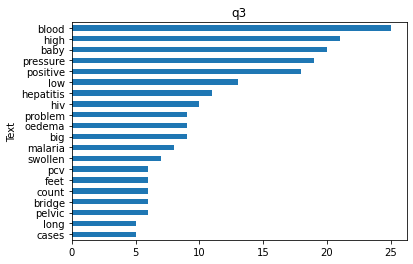

In [19]:
import matplotlib.pyplot as plt
q3_unigrams = ut2.get_top_n_words(df['q3_clean'],20)
q3_df = pd.DataFrame(q3_unigrams, columns = ['Text' , 'count'])

q3_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= 'q3')
plt.show()

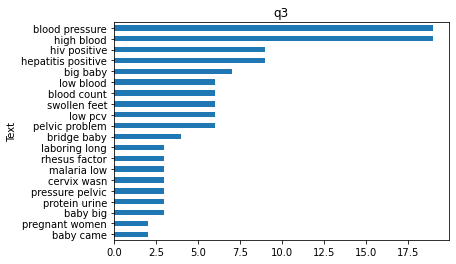

In [20]:
q3_bigrams = ut2.get_top_n_gram(df['q3_clean'],(2,2),20)
q3_bigrams_df = pd.DataFrame(q3_bigrams, columns = ['Text' , 'count'])

q3_bigrams_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= 'q3')
plt.show()

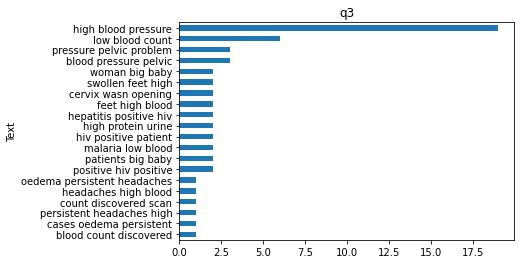

In [21]:
q3_trigrams = ut2.get_top_n_gram(df['q3_clean'],(3,3),20)
q3_trigrams_df = pd.DataFrame(q3_trigrams, columns = ['Text' , 'count'])

q3_trigrams_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= 'q3')
plt.show()

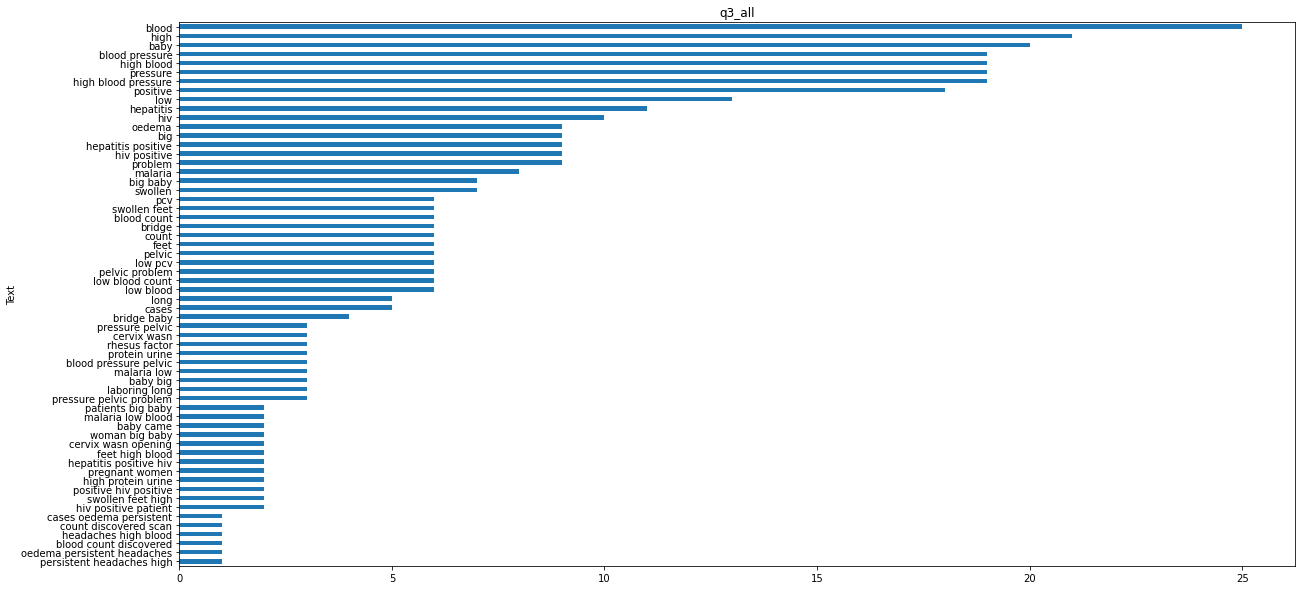

In [22]:
all_df = pd.concat([q3_bigrams_df, q3_trigrams_df, q3_df])
all_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= 'q3_all', figsize=(20,10))
plt.show()

### Question 5: what are the solutions you preferred?

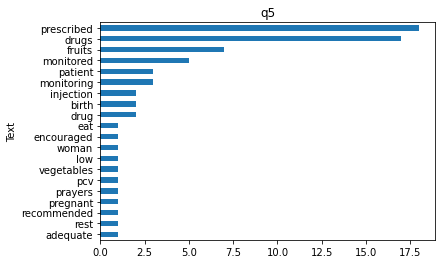

In [23]:
q5_unigrams = ut2.get_top_n_words(df['q5_clean'],20)
q5_df = pd.DataFrame(q5_unigrams, columns = ['Text' , 'count'])

q5_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= 'q5')
plt.show()

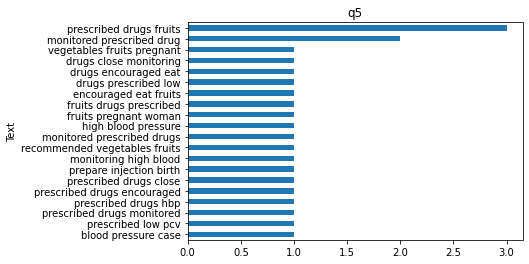

In [24]:
q5_trigrams = ut2.get_top_n_gram(df['q5_clean'],(3,3),20)
q5_trigrams_df = pd.DataFrame(q5_trigrams, columns = ['Text' , 'count'])

q5_trigrams_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= 'q5')
plt.show()

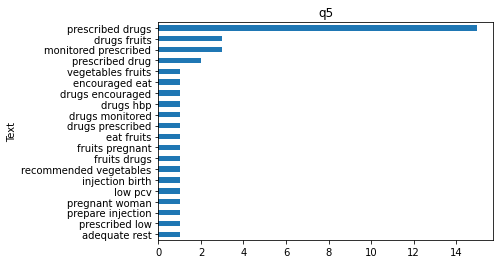

In [26]:
q5_bigrams = ut2.get_top_n_gram(df['q5_clean'],(2,2),20)
q5_bigrams_df = pd.DataFrame(q5_bigrams, columns = ['Text' , 'count'])

q5_bigrams_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= 'q5')
plt.show()


### Question 6: What was the end result of the situation?

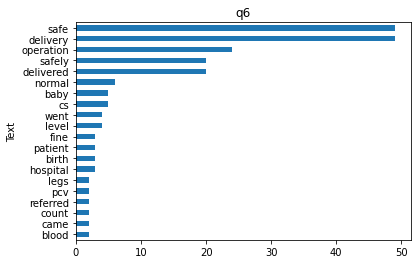

In [27]:
q6_unigrams = ut2.get_top_n_words(df['q6_clean'],20)
q6_df = pd.DataFrame(q6_unigrams, columns = ['Text' , 'count'])

q6_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= 'q6')
plt.show()

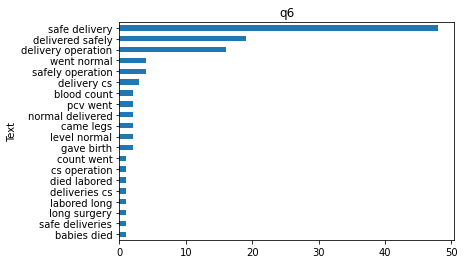

In [28]:
q6_bigrams = ut2.get_top_n_gram(df['q6_clean'],(2,2),20)
q6_bigrams_df = pd.DataFrame(q6_bigrams, columns = ['Text' , 'count'])

q6_bigrams_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title= 'q6')
plt.show()

## Data Analysis - Answering the questions formulated 

### 1) How many pregnant women have you registered in the past one year?

In [42]:
sum(df.q1_clean) # total number of pregnant women registered

3335

### Question 2: How often do these pregnant women attend antenatal?

Text(0.5, 1.0, 'Antenatal Attendance')

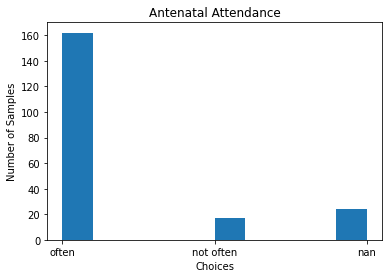

In [46]:
plt.hist(df.q2_clean.astype('str'))
plt.ylabel('Number of Samples')
plt.xlabel('Choices')
plt.title('Antenatal Attendance')

### Did you refer them to a hospital ?

Text(0.5, 0, 'Referred or Not')

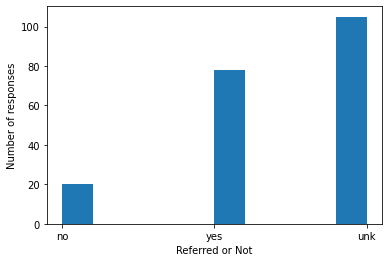

In [47]:
plt.hist(df.q4_clean.astype('str'))
plt.ylabel('Number of responses')
plt.xlabel('Referred or Not')

### Is there a relationship between the number of patients a clinic sees and attendance of antenatal care?


Text(0.5, 1.0, 'Distribution of the number of patients seen by clinics')

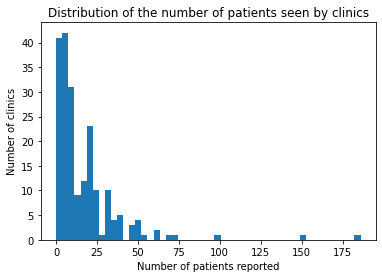

In [52]:
plt.hist(df.q1_clean, bins = 50)
plt.ylabel('Number of clinics')
plt.xlabel('Number of patients reported')
plt.title('Distribution of the number of patients seen by clinics')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

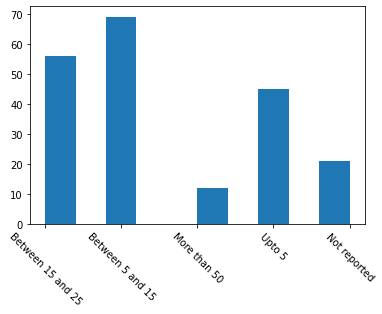

In [57]:
def pat_bucket(x):
    if x == 0:
        return 'Not reported'
    elif x >0 and x <=5:
        return 'Upto 5'
    elif x >5 and x <=15:
        return 'Between 5 and 15'
    elif x>15 and x < 50:
        return 'Between 15 and 25'
    else:
        return 'More than 50'
    
pat_cat = df.q1_clean.apply(pat_bucket)

plt.hist(pat_cat)
plt.xticks(rotation = -45)

In [61]:
df['patient_cnt'] = pat_cat

In [64]:
df['q2_clean1'] = df['q2_clean'].fillna('UNK')

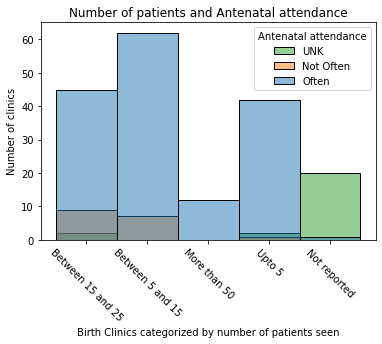

In [75]:
# import seaborn as sns

sns.histplot(data = df, x = 'patient_cnt', hue= 'q2_clean1', label = 'Antenatal Attendence')
plt.title('Number of patients and Antenatal attendance')
plt.xticks(rotation = -45)
plt.xlabel('Birth Clinics categorized by number of patients seen')
plt.ylabel('Number of clinics')
plt.legend(['UNK', 'Not Often', 'Often'],title = 'Antenatal attendance', )

### Relationship between antenatal attendance and cases referred to the hospital

Text(0.5, 1.0, 'Between 15 and 25')

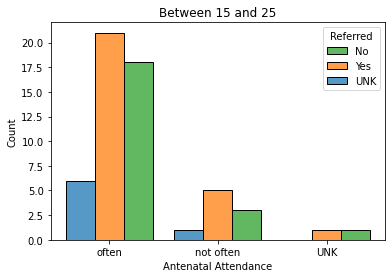

In [148]:
c = ["blue", "red", "green"]

cats = list(set(df.patient_cnt))
rows = 1
cols = 5
# fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (20,10))

df.rename(columns={'q2_clean1':'Antenatal Attendance'}, inplace=True)
df.rename(columns={'q4_clean':'Referred'}, inplace=True)

# for i, c in enumerate(cats):
# #     sns.distplot(df[col], ax = axes[i//cols, i%cols])
#     sns.histplot(data = df[df.patient_cnt == c], x = 'Antenatal Attendance', hue = 'Referred',edgecolor = 'k', ax = axes[i])
#     ax.legend(labels = ['No','Yes','UNK']) 


sns.histplot(data = df[df.patient_cnt == cats[0]], x = 'Antenatal Attendance', hue = 'Referred',edgecolor = 'k',
             multiple='dodge',shrink=.8)
plt.legend(labels = ['No','Yes','UNK'], title = 'Referred') 
plt.title(cats[0])


Text(0.5, 1.0, 'More than 50')

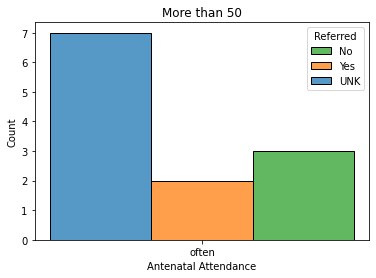

In [147]:
sns.histplot(data = df[df.patient_cnt == cats[1]], x = 'Antenatal Attendance', hue = 'Referred',edgecolor = 'k',
             multiple = 'dodge',shrink=.8)
plt.legend(labels = ['No','Yes','UNK'], title = 'Referred') 
plt.title(cats[1])

Text(0.5, 1.0, 'Between 5 and 15')

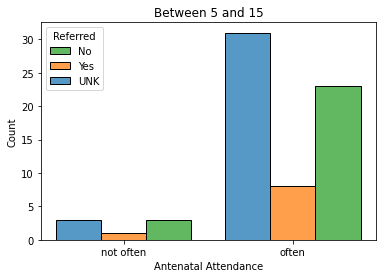

In [146]:
sns.histplot(data = df[df.patient_cnt == cats[2]], x = 'Antenatal Attendance', hue = 'Referred',edgecolor = 'k',
             multiple = 'dodge',shrink=.8)
plt.legend(labels = ['No','Yes','UNK'], title = 'Referred') 
plt.title(cats[2])

Text(0.5, 1.0, 'Not reported')

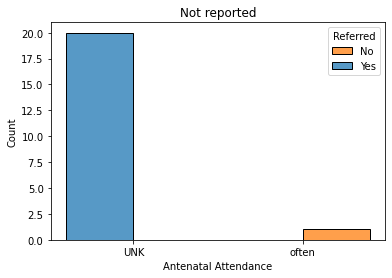

In [145]:
sns.histplot(data = df[df.patient_cnt == cats[3]], x = 'Antenatal Attendance', hue = 'Referred',edgecolor = 'k',
             multiple = 'dodge',shrink=.8)
plt.legend(labels = ['No','Yes','UNK'], title = 'Referred') 
plt.title(cats[3])

Text(0.5, 1.0, 'Upto 5')

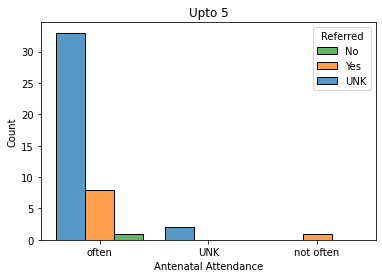

In [144]:
sns.histplot(data = df[df.patient_cnt == cats[4]], x = 'Antenatal Attendance', hue = 'Referred',edgecolor = 'k',
             multiple = 'dodge',shrink=.8)
plt.legend(labels = ['No','Yes','UNK'], title = 'Referred') 
plt.title(cats[4])

### When a certain treatment/drugs was prescribed, what was the end result?


In [156]:
def identify_safe_delivery(x):
    
    if 'safe' in x[:20]:
        return 'safe delivery'
    elif x == '':
        return 'UNK'
    else:
        return x
    
q6_std = df.q6_clean.apply(identify_safe_delivery)
set(q6_std)

{'UNK',
 'diseases was cured',
 'don t know because the pregnant woman left the city',
 'one of the babies died labored for too long surgery was performed on the one in a weird position during pregnancy to straighten the leg after birth there had to be follow up procedure for the ones that came out with their legs on his head use of bandage and warm water after an xray was carried out to see the damage done for days during the delivery of the one that came out with two legs one of the arms had to be broken for the baby to come out and afterwards they were referred to the hospital',
 'safe delivery',
 'she delivered but the baby had already',
 'she occasionally checks on the one with oedema and nothing abnormal has happened so far the hiv patient is fine and she delivered safely',
 'she s still under treatment',
 'the baby didn t make it',
 'the blood count level is back to normal',
 'the blood count went back to normal and she delivered safely',
 'the level is now on a normal level',
 

In [157]:
q6_dict = {}

for x in set(q6_std):
    if x not in q6_dict:
        print('Map to choice - safe delivery/ recovered safe/ not safe :',x)
        q6_dict[x] = input()

print(q6_dict)

Map to choice - safe delivery/ recovered safe/ not safe : the pcv went back to normal and they delivered safely
recovered safe
Map to choice - safe delivery/ recovered safe/ not safe : she occasionally checks on the one with oedema and nothing abnormal has happened so far the hiv patient is fine and she delivered safely
recovered safe
Map to choice - safe delivery/ recovered safe/ not safe : the patient is scheduled for operation
not safe
Map to choice - safe delivery/ recovered safe/ not safe : she delivered but the baby had already
not safe
Map to choice - safe delivery/ recovered safe/ not safe : they both delivered safely
safe delivery
Map to choice - safe delivery/ recovered safe/ not safe : the pcv went back to normal
recovered safe
Map to choice - safe delivery/ recovered safe/ not safe : the level is now on a normal level
recovered safe
Map to choice - safe delivery/ recovered safe/ not safe : one of the babies died labored for too long surgery was performed on the one in a wei

In [158]:
def map_delivery_response(x):
    return q6_dict[x]

q6_std1 = q6_std.apply(map_delivery_response)

Text(0, 0.5, 'Number of responses from the birth clinics')

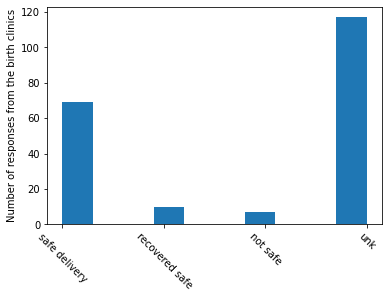

In [161]:
plt.hist(q6_std1)
plt.xticks(rotation = -45)
plt.ylabel('Number of responses from the birth clinics')

In [168]:
ngrams = ut2.get_top_n_gram(df.q3_clean, (1,3), 30)
ngrams_df = pd.DataFrame(ngrams, columns = ['Text' , 'count'])
ngrams_df

,Text,count
0,blood,25
1,high,21
2,baby,20
3,pressure,19
4,high blood,19
5,blood pressure,19
6,high blood pressure,19
7,positive,18
8,low,13
9,hepatitis,11


In [199]:
common_challenges_identified = ['high blood pressure','hiv', 'hepatitis', 'malaria', 'big baby', 'low blood count' ]    

challenge_df = pd.DataFrame()

for c in common_challenges_identified:
    x = []
    for i in df.q3_clean:
        if c in i:
            x.append(1)
        else:
            x.append(0)
    challenge_df[c] = x
    
challenge_df

,high blood pressure,hiv,hepatitis,malaria,big baby,low blood count
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
198,0,0,0,0,0,0
199,0,0,0,0,1,0
200,0,0,0,0,0,0
201,0,0,0,0,0,0


In [171]:
ngrams = ut2.get_top_n_gram(df.q5_clean, (1,3), 30)
ngrams_df = pd.DataFrame(ngrams, columns = ['Text' , 'count'])
ngrams_df

,Text,count
0,prescribed,18
1,drugs,17
2,prescribed drugs,15
3,fruits,7
4,monitored,5
5,drugs fruits,3
6,prescribed drugs fruits,3
7,monitored prescribed,3
8,monitoring,3
9,patient,3


In [174]:
common_solutions = ['prescribed drugs', 'fruits', 'monitor', 'injection', 'prayer', 'rest']

solution_df = pd.DataFrame()

for c in common_solutions:
    x = []
    for i in df.q5_clean:
        if c in i:
            x.append(1)
        else:
            x.append(0)
    solution_df[c] = x
    
solution_df

,prescribed drugs,fruits,monitor,injection,prayer,rest
0,0,0,0,0,1,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
198,0,0,0,0,0,0
199,0,0,0,0,0,0
200,0,0,0,0,0,0
201,0,0,0,0,0,0


In [200]:
challenge_df.groupby(common_challenges_identified).size()

high blood pressure  hiv  hepatitis  malaria  big baby  low blood count
0                    0    0          0        0         0                  156
                                                        1                    4
                                              1         0                    4
                                     1        0         0                    4
                                                        1                    1
                          1          0        0         0                    5
                                     1        0         0                    1
                     1    0          0        0         0                    6
                                     1        0         1                    1
                          1          0        0         0                    2
1                    0    0          0        0         0                   14
                                              1         0  

In [181]:
solution_df.groupby(common_solutions).size()

prescribed drugs  fruits  monitor  injection  prayer  rest
0                 0       0        0          0       0       178
                                                      1         1
                                              1       0         1
                                   1          0       0         1
                          1        0          0       0         5
                  1       0        0          0       0         2
1                 0       0        0          0       0         6
                                   1          0       0         1
                          1        0          0       0         3
                  1       0        0          0       0         5
dtype: int64

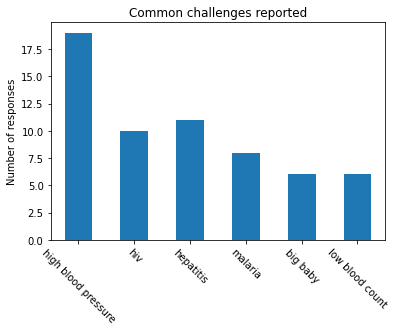

In [221]:
dplt = pd.DataFrame(np.sum(challenge_df), columns = ['count']).plot(kind = 'bar', legend = None)
plt.xticks(rotation = -45)
plt.ylabel('Number of responses')
plt.title('Common challenges reported')
plt.show()

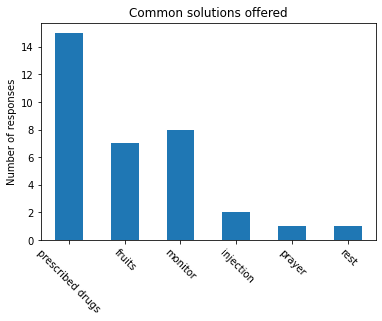

In [220]:
dplt = pd.DataFrame(np.sum(solution_df), columns = ['count']).plot(kind = 'bar', legend = None)
plt.xticks(rotation = -45)
plt.ylabel('Number of responses')
plt.title('Common solutions offered')
plt.show()

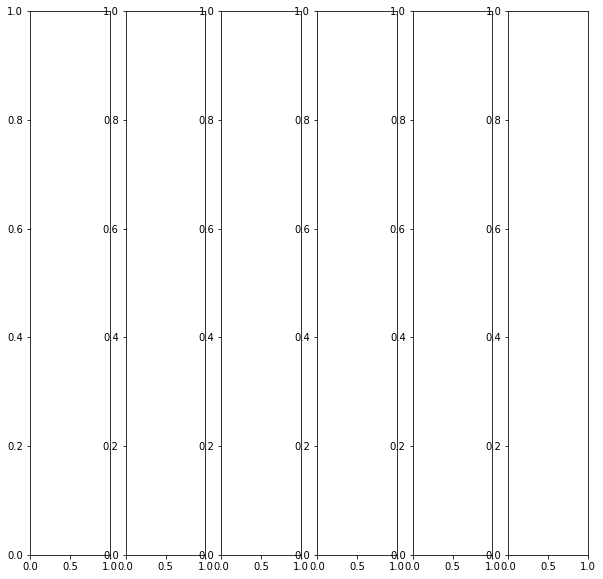

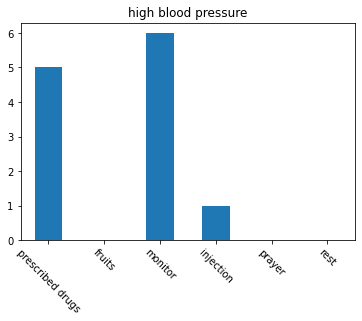

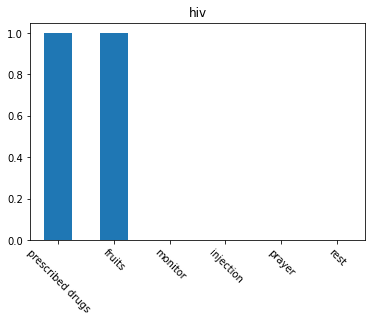

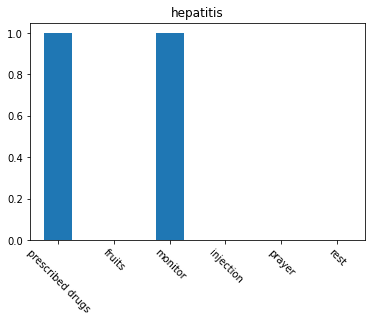

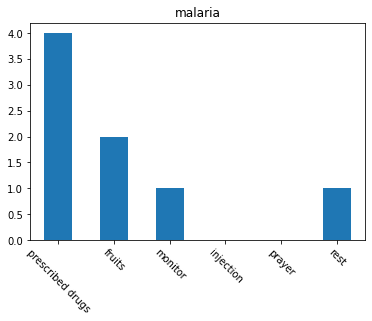

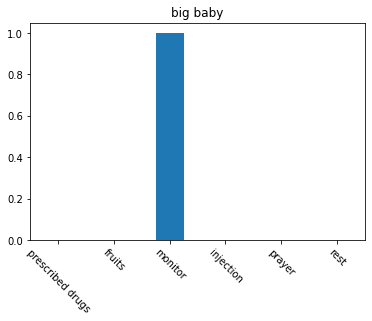

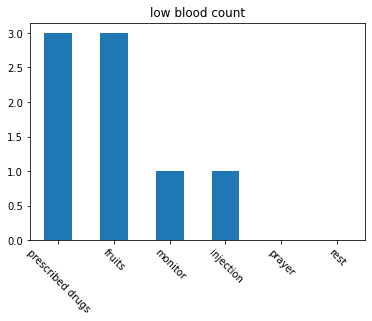

In [223]:
rows = 1
cols = len(common_challenges_identified)

fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (10,10))

for i, c in enumerate(common_challenges_identified):
    data = solution_df[challenge_df[c] == 1]
    data = pd.DataFrame(np.sum(data), columns = ['Count'])
    axes[i] = data.plot(kind = 'bar', legend = None, title = c)
    plt.xticks(rotation = -45)


### Which diseases were NOT referred to the hospital and what was the outcome?

In [33]:
def plot_ngrams(df, question, title):
    '''
    Function to plot ngrams of a dataframe
    '''
    import matplotlib.pyplot as plt
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle(title)
    plt.rc('font', size=17) 
    plt.rcParams["figure.figsize"] = (60,7)

    # Get ngrams
    
    ngrams = ut2.get_top_n_gram(df[question], (1,1), 20)
    ngrams_df = pd.DataFrame(ngrams, columns = ['Text' , 'count'])

    ngram_2 = ut2.get_top_n_gram(df[question], (2,2), 20)
    ngrams_df_2 = pd.DataFrame(ngram_2, columns = ['Text' , 'count'])

    ngram_3 = ut2.get_top_n_gram(df[question], (3,3), 20)
    ngrams_df_3 = pd.DataFrame(ngram_3, columns = ['Text' , 'count'])

    ngram_all = pd.concat([ngrams_df, ngrams_df_2, ngrams_df_3])
    
    # Group by ngram and sum counts
    ngrams_df.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title='ngram_1', ax=ax1)
    ngrams_df_2.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title='ngram_2', ax=ax2)
    ngrams_df_3.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title='ngram_3', ax=ax3)
    # ngram_all.groupby('Text').sum()['count'].sort_values(ascending=True).plot.barh(title='ngram_all', ax=ax4)

    # the percentage of ngrams are from the occurence count of each word / word combination divided by the number of studies done(length of dataframe
    ngram_all['percentage'] = (ngram_all['count']/len(df))*100
    ngram_all = ngram_all.sort_values(by='percentage', ascending=False)


    
    plt.show()
    return ngram_all.head(20)

In [29]:
not_referred_df = df[df.q4_clean == 'no']

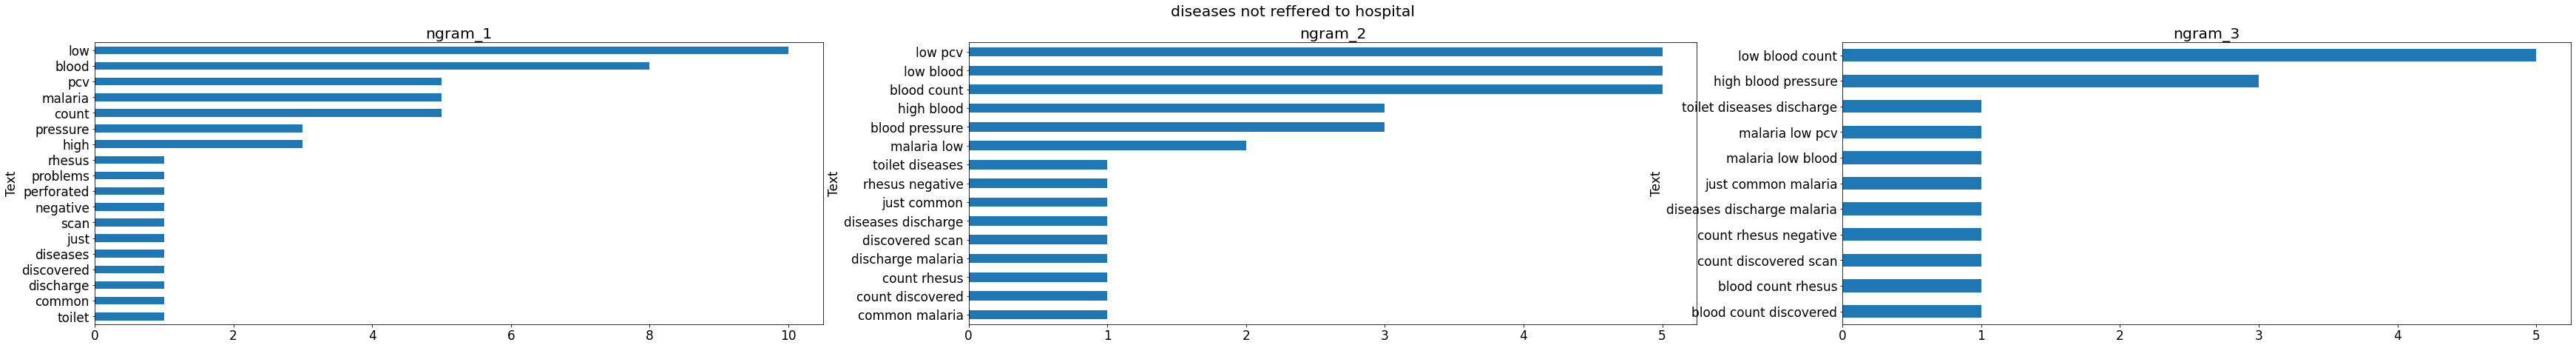

,Text,count,percentage
0,low,10,50.0
1,blood,8,40.0
0,low blood,5,25.0
2,count,5,25.0
3,malaria,5,25.0
4,pcv,5,25.0
0,low blood count,5,25.0
2,low pcv,5,25.0
1,blood count,5,25.0
1,high blood pressure,3,15.0


In [34]:
plot_ngrams(not_referred_df, 'q3_clean', 'diseases not reffered to hospital')

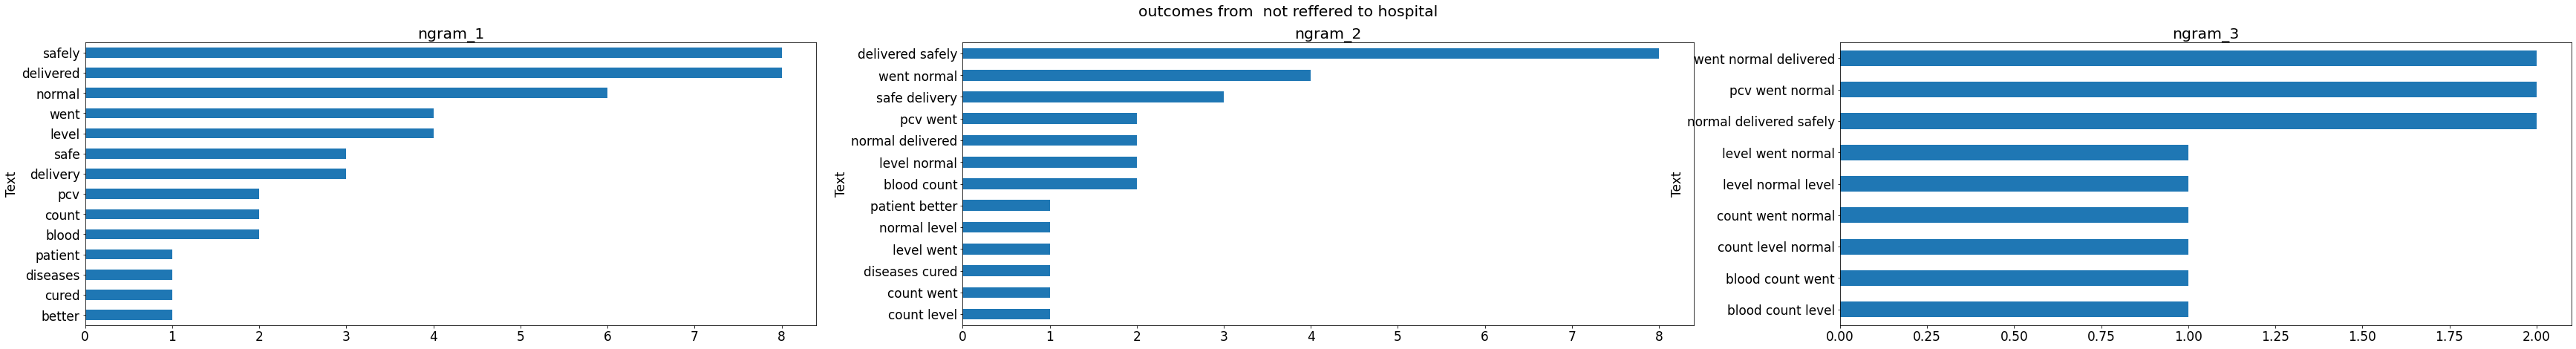

,Text,count,percentage
0,delivered,8,40.0
1,safely,8,40.0
0,delivered safely,8,40.0
2,normal,6,30.0
3,went,4,20.0
4,level,4,20.0
1,went normal,4,20.0
2,safe delivery,3,15.0
5,safe,3,15.0
6,delivery,3,15.0


In [35]:
plot_ngrams(not_referred_df, 'q6_clean', 'outcomes from  not reffered to hospital')

### Which disease were referred to the hospital and what was the outcome?

In [36]:
referred_df = df[df.q4_clean == 'yes']

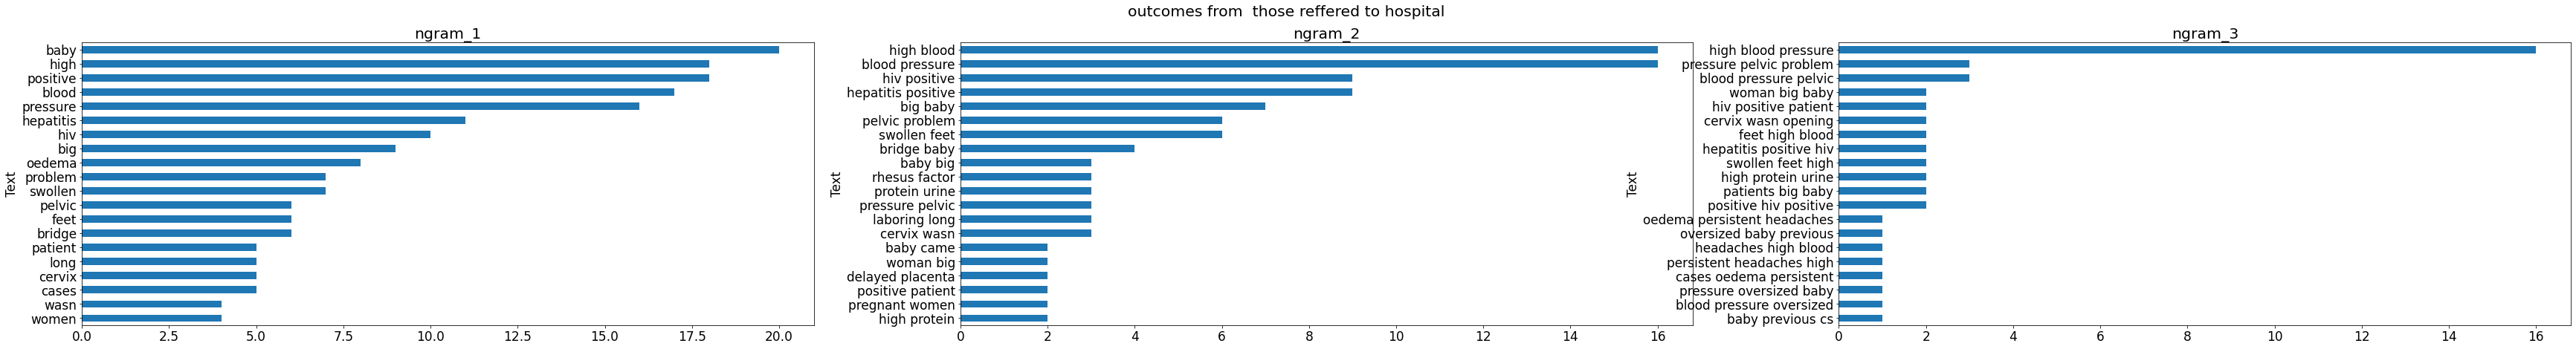

,Text,count,percentage
0,baby,20,25.641026
2,positive,18,23.076923
1,high,18,23.076923
3,blood,17,21.794872
0,high blood,16,20.512821
1,blood pressure,16,20.512821
0,high blood pressure,16,20.512821
4,pressure,16,20.512821
5,hepatitis,11,14.102564
6,hiv,10,12.820513


In [37]:
plot_ngrams(referred_df, 'q3_clean', 'outcomes from  those reffered to hospital')

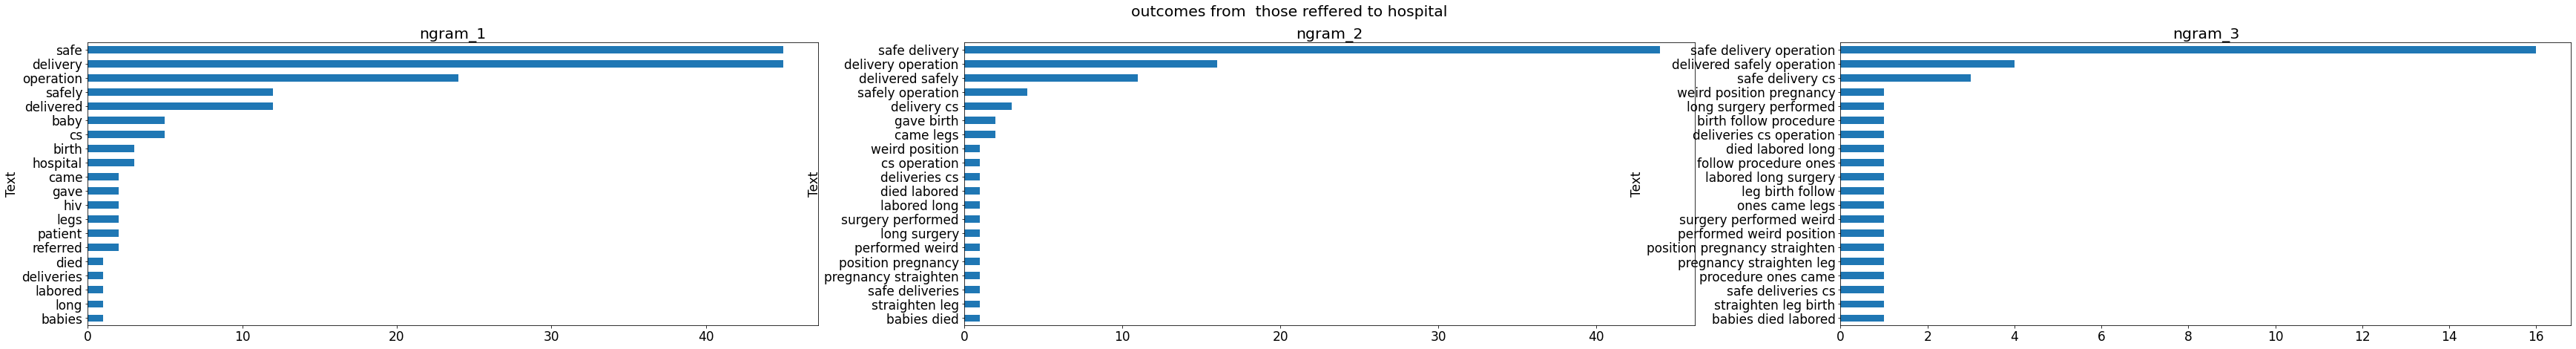

,Text,count,percentage
0,safe,45,57.692308
1,delivery,45,57.692308
0,safe delivery,44,56.410256
2,operation,24,30.769231
0,safe delivery operation,16,20.512821
1,delivery operation,16,20.512821
4,safely,12,15.384615
3,delivered,12,15.384615
2,delivered safely,11,14.102564
5,cs,5,6.410256


In [38]:
plot_ngrams(referred_df, 'q6_clean', 'outcomes from  those reffered to hospital')

### what are the most common solutions proposed

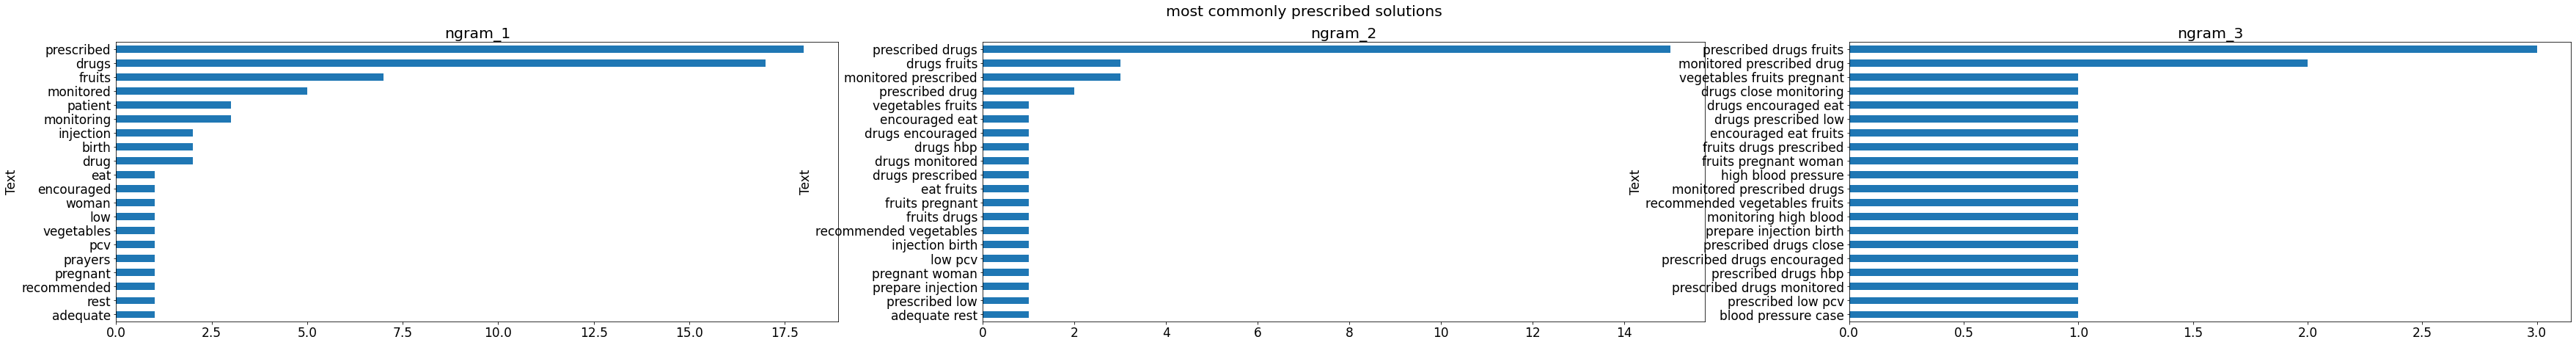

,Text,count,percentage
0,prescribed,18,8.866995
1,drugs,17,8.374384
0,prescribed drugs,15,7.389163
2,fruits,7,3.448276
3,monitored,5,2.463054
1,drugs fruits,3,1.477833
0,prescribed drugs fruits,3,1.477833
5,patient,3,1.477833
4,monitoring,3,1.477833
2,monitored prescribed,3,1.477833


In [39]:
plot_ngrams(df, 'q5_clean', 'most commonly prescribed solutions')